## **1. Data Acquisition**

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading a dataset**

In [2]:
loans= pd.read_csv("loan_data.csv")

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## **2. Data Cleaning**

### **Exploratory Data Analysis(EDA)**

Text(0.5, 0, 'fico')

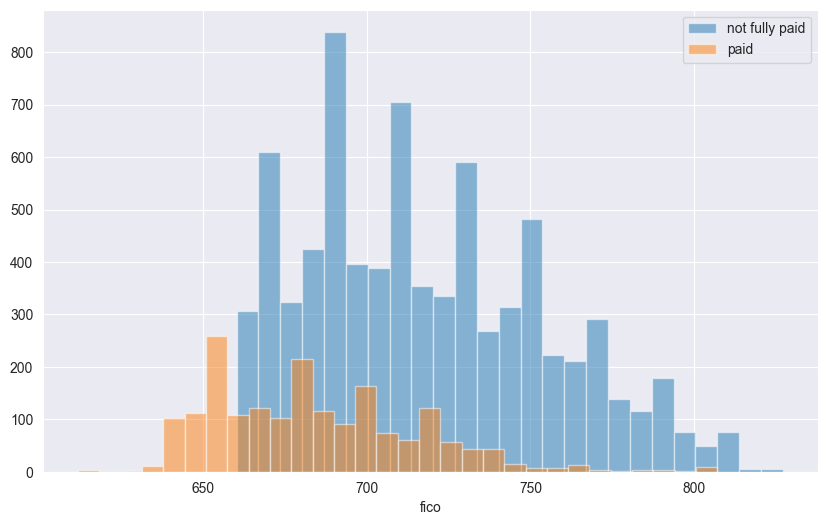

In [5]:
plt.figure(figsize=(10,6))
loans[loans["credit.policy"]==1]["fico"].hist(bins=30, alpha=0.5, label="not fully paid")
loans[loans["credit.policy"]==0]["fico"].hist(bins=30, alpha=0.5, label="paid")
plt.legend()
plt.xlabel("fico")

<Axes: xlabel='purpose', ylabel='count'>

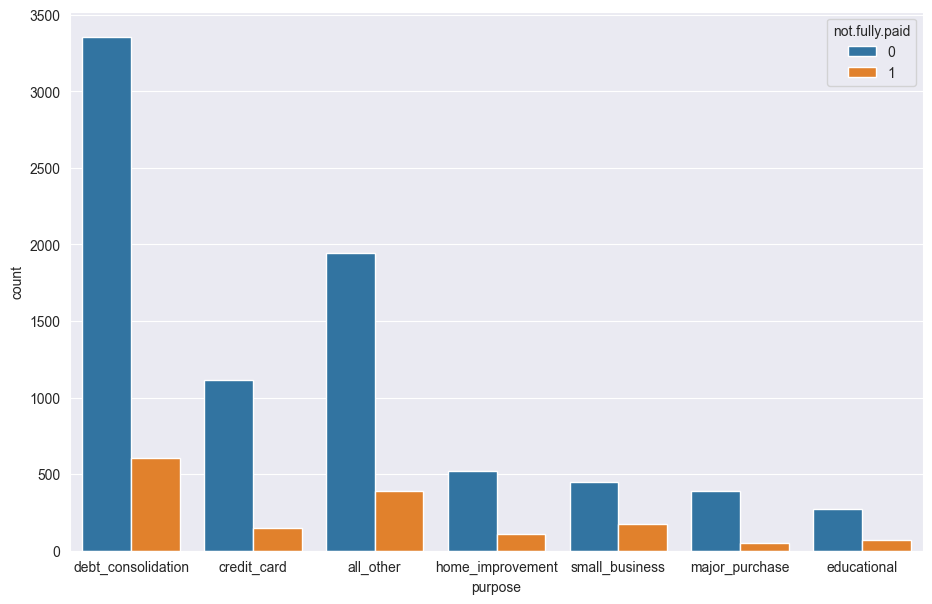

In [6]:
plt.figure(figsize=(11,7))
sns.countplot(data=loans, x="purpose", hue="not.fully.paid")

## **3. Model Training & Building**

### **X and y arrays**

In [7]:
X= loans[["credit.policy","fico","int.rate"]]
y=loans["not.fully.paid"]

### **Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### **Creating and Training the Model**

**i) Importing a model**

In [10]:
# Select a model
from sklearn.ensemble import RandomForestClassifier

**ii) Instantiation**

In [11]:
# Instantiate
rfc= RandomForestClassifier(n_estimators=500)

**iii) Model fitting**

In [12]:
# Training / Fitting
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

## **4. Model Prediction & Evaluation**

### **Prediction**

In [13]:
# Prediction
rfc_predict= rfc.predict(X_test)
rfc_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### **Evaluation**

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
accuracy_score(y_test, rfc_predict)
# Decision Tree: 0.796

0.8006263048016702

In [16]:
confusion_matrix(y_test, rfc_predict)
# Decision Tree:   2249    182
               #    404     39

array([[2262,  169],
       [ 404,   39]], dtype=int64)